── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




[1] "#E64B35FF" "#4DBBD5FF" "#00A087FF" "#3C5488FF" "#F39B7FFF" "#8491B4FF"
[7] "#91D1C2FF" "#DC0000FF" "#7E6148FF"

Loading required package: viridisLite


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




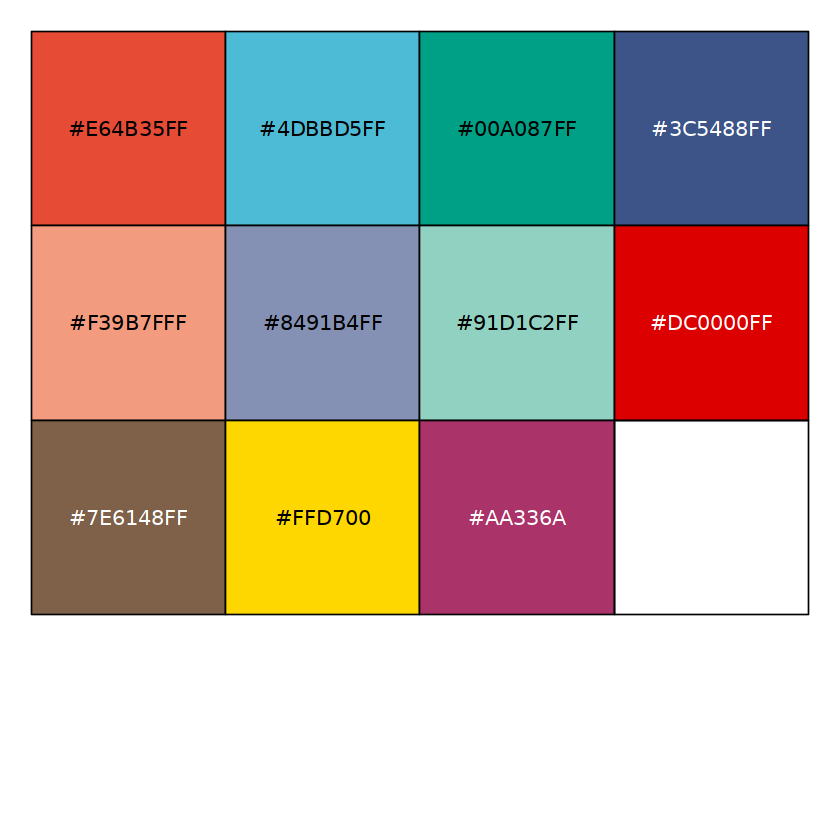

In [1]:
library(tidyverse)

options(scipen=999)
options(repr.matrix.max.cols=50, repr.matrix.max.rows=20)

library(cowplot)

library(patchwork)
library(ggsci)
library(ggrepel)

pal_npg("nrc")(9)

color_pal = readRDS("../results/methods_color_pal.rds")
shape_pal = c(15, 17, 3)
names(shape_pal) = c('O2O', 'HE', 'SH')

library(viridis)
library(scales)

show_col(color_pal)

library(ggpubr)
library(scales)


text_sizes <- theme(axis.text.x=element_text(size=9,colour="black"),
                      axis.text.y=element_text(size=9,colour="black"),
                      axis.title.y=element_text(size=9,colour="black", face='bold', margin = margin(t = 2, l = 2, r = 2, b =2, unit = "pt")),
                      axis.title.x=element_text(size=9,colour="black", face='bold', margin = margin(t = 2, l = 2, r = 2, b = 2, unit = "pt")),
                      legend.text = element_text(size=9,colour="black"),
                      legend.title = element_text(size=9,colour="black", margin = margin(t = 5, l = 0, r = 0, b = 5, unit = "pt")),
                      legend.key = element_rect(colour="transparent", fill = "transparent"),
                      strip.text.x = element_text(size=10,color = 'black',face="bold", angle=0),
                      strip.text.y = element_text(size=10,color = 'black', face="bold", angle=0, vjust=0.5, hjust=0),
                      axis.ticks= element_line(color = 'black', size=0.2),
                      axis.line = element_line(colour = "black", size = 0.2, linetype = "solid"),
                      plot.margin=unit(c(2,2,2,2),"pt"),
                      plot.title=element_text(size=12, face="bold", colour="black"))


common_minimal <- text_sizes + theme(
        plot.background = element_rect(fill = NA,colour = NA),
        strip.background = element_rect(fill = NA,colour = NA),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank()) + theme(
    legend.spacing = unit(0.15, 'cm'), 
    legend.key.size = unit(0.2, "cm"))  +
    theme(legend.spacing.y = unit(5, 'pt'),
    legend.text = element_text(margin = margin(t = 7)))


# commonly used, x axis text 45 degree
common_0x <- common_minimal + theme(axis.text.x = element_text(angle=0))

In [2]:
shape_pal

O2O  HE  SH 
 15  17   3

In [3]:
all_scores = read_csv("../results/all_tasks_metrics_scores_ranks.csv")

species_order = c("hsapiens", "mfascicularis", "mmulatta", "mmusculus", "sscrofa", "xtropicalis", "drerio")

Rows: 480 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): type, integration_method_batch, homology_method_batch, integration...
dbl (39): PCR, iLISI, bASW, GC, kBET, bASW_scaled, GC_scaled, kBET_scaled, P...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
levels(factor(all_scores$task_name))

[1] "Embryo_dr_xt"         "Heart_hs_dr"          "Heart_hs_mf"         
 [4] "Heart_hs_mf_mm"       "Heart_hs_mf_mm_xl"    "Heart_hs_mf_mm_xl_dr"
 [7] "Heart_hs_mm"          "Heart_hs_xl"          "Heart_mf_dr"         
[10] "Heart_mf_mm"          "Heart_mf_xl"          "Heart_mm_dr"         
[13] "Heart_mm_xl"          "Heart_xl_dr"          "Hippocampus_hs_mu_ss"
[16] "Pancreas_hs_mm"

In [5]:
colnames(all_scores)

[1] "type"                                "PCR"                                
 [3] "iLISI"                               "bASW"                               
 [5] "GC"                                  "kBET"                               
 [7] "integration_method_batch"            "homology_method_batch"              
 [9] "bASW_scaled"                         "GC_scaled"                          
[11] "kBET_scaled"                         "PCR_scaled"                         
[13] "iLISI_scaled"                        "avg_score_batch"                    
[15] "iLISI_scaled_rank"                   "GC_scaled_rank"                     
[17] "PCR_scaled_rank"                     "bASW_scaled_rank"                   
[19] "kBET_scaled_rank"                    "avg_score_scaled_rank_batch"        
[21] "cASW"                                "cLISI"                              
[23] "ARI"                                 "NMI"                                
[25] "iso_F1"                              "integration_method_bio"             
[27] "homology_method_bio"                 "cASW_scaled"                        
[29] "ARI_scaled"                          "NMI_scaled"                         
[31] "iso_F1_scaled"                       "cLISI_scaled"                       
[33] "avg_score_bio"                       "cLISI_scaled_rank"                  
[35] "NMI_scaled_rank"                     "ARI_scaled_rank"                    
[37] "cASW_scaled_rank"                    "iso_F1_scaled_rank"                 
[39] "avg_score_scaled_rank_bio"           "integrated_score"                   
[41] "integrated_score_rank"               "task_name"                          
[43] "trajectory_conservation_score_batch" "traj_scaled"                        
[45] "traj_scaled_rank"

In [6]:
levels(factor(all_scores$integration_method_batch))

[1] "fastMNN"       "Harmony"       "LIGER"         "LIGER UINMF"  
 [5] "Scanorama"     "scANVI"        "scVI"          "SeuratV4 CCA" 
 [9] "SeuratV4 RPCA" "unintegrated"

In [7]:
levels(factor(all_scores$homology_method_batch))

[1] "HE"  "O2O" "SH"

In [8]:
all_scores$type <- paste(all_scores$integration_method_batch, all_scores$homology_method_batch)

In [9]:
levels(factor(all_scores$type))

[1] "fastMNN HE"        "fastMNN O2O"       "fastMNN SH"       
 [4] "Harmony HE"        "Harmony O2O"       "Harmony SH"       
 [7] "LIGER HE"          "LIGER O2O"         "LIGER SH"         
[10] "LIGER UINMF HE"    "LIGER UINMF O2O"   "LIGER UINMF SH"   
[13] "Scanorama HE"      "Scanorama O2O"     "Scanorama SH"     
[16] "scANVI HE"         "scANVI O2O"        "scANVI SH"        
[19] "scVI HE"           "scVI O2O"          "scVI SH"          
[22] "SeuratV4 CCA HE"   "SeuratV4 CCA O2O"  "SeuratV4 CCA SH"  
[25] "SeuratV4 RPCA HE"  "SeuratV4 RPCA O2O" "SeuratV4 RPCA SH" 
[28] "unintegrated HE"   "unintegrated O2O"  "unintegrated SH"

In [10]:
task_order = c('Pancreas_hs_mm', 'Hippocampus_hs_mu_ss', 'Embryo_dr_xt', 'Heart_hs_mf', 'Heart_hs_mm', 'Heart_hs_xl', 'Heart_hs_dr',
              'Heart_mf_mm', 'Heart_mf_xl', 'Heart_mf_dr', 'Heart_mm_xl', 'Heart_mm_dr', 'Heart_xl_dr', 'Heart_hs_mf_mm', 'Heart_hs_mf_mm_xl', 
              'Heart_hs_mf_mm_xl_dr'
)

In [11]:
all_scores = all_scores %>% 
group_by(task_name) %>% 
mutate(batch_median = median(avg_score_batch)) %>% 
mutate(bio_median = median(avg_score_bio)) %>% ungroup()

In [12]:
un_medians = all_scores %>% filter(integration_method_batch == 'unintegrated') %>% group_by(task_name) %>% 
mutate(batch_median_un = median(avg_score_batch)) %>% 
mutate(bio_median_un = median(avg_score_bio)) %>% 
select(task_name, type, batch_median_un, bio_median_un ) %>% ungroup()


In [13]:
head(un_medians)

task_name,type,batch_median_un,bio_median_un
<chr>,<chr>,<dbl>,<dbl>
Pancreas_hs_mm,unintegrated HE,0.1608261,0.709618
Pancreas_hs_mm,unintegrated SH,0.1608261,0.709618
Pancreas_hs_mm,unintegrated O2O,0.1608261,0.709618
Hippocampus_hs_mu_ss,unintegrated HE,0.3705150,0.525836
Hippocampus_hs_mu_ss,unintegrated O2O,0.3705150,0.525836
Hippocampus_hs_mu_ss,unintegrated SH,0.3705150,0.525836


In [14]:
ref_task_order = c('Pancreas_hs_mm', 'Hippocampus_hs_mu_ss', 'Embryo_dr_xt', 'Heart_hs_mf', 'Heart_hs_mf_mm', 'Heart_hs_mf_mm_xl', 'Heart_hs_mf_mm_xl_dr')

In [15]:
overall_order = all_scores %>% group_by(type) %>% filter(task_name %in% ref_task_order) %>% 
mutate(average_integrated_score = mean(integrated_score)) %>% 
ungroup() %>% arrange(desc(average_integrated_score)) %>%  pull(type) %>% unique() 

In [16]:
overall_order

[1] "scANVI SH"         "scANVI O2O"        "scANVI HE"        
 [4] "SeuratV4 CCA HE"   "SeuratV4 CCA SH"   "SeuratV4 RPCA HE" 
 [7] "SeuratV4 CCA O2O"  "SeuratV4 RPCA SH"  "SeuratV4 RPCA O2O"
[10] "Harmony HE"        "Harmony O2O"       "Harmony SH"       
[13] "scVI SH"           "scVI HE"           "fastMNN SH"       
[16] "scVI O2O"          "fastMNN HE"        "fastMNN O2O"      
[19] "Scanorama SH"      "Scanorama HE"      "Scanorama O2O"    
[22] "unintegrated HE"   "unintegrated O2O"  "unintegrated SH"  
[25] "LIGER HE"          "LIGER SH"          "LIGER O2O"        
[28] "LIGER UINMF SH"    "LIGER UINMF HE"    "LIGER UINMF O2O"

In [17]:
overall_order

[1] "scANVI SH"         "scANVI O2O"        "scANVI HE"        
 [4] "SeuratV4 CCA HE"   "SeuratV4 CCA SH"   "SeuratV4 RPCA HE" 
 [7] "SeuratV4 CCA O2O"  "SeuratV4 RPCA SH"  "SeuratV4 RPCA O2O"
[10] "Harmony HE"        "Harmony O2O"       "Harmony SH"       
[13] "scVI SH"           "scVI HE"           "fastMNN SH"       
[16] "scVI O2O"          "fastMNN HE"        "fastMNN O2O"      
[19] "Scanorama SH"      "Scanorama HE"      "Scanorama O2O"    
[22] "unintegrated HE"   "unintegrated O2O"  "unintegrated SH"  
[25] "LIGER HE"          "LIGER SH"          "LIGER O2O"        
[28] "LIGER UINMF SH"    "LIGER UINMF HE"    "LIGER UINMF O2O"

In [18]:
library(ggrepel)

In [19]:
options(repr.plot.height = 10, repr.plot.width =10)

In [20]:
head(all_scores)

type,PCR,iLISI,bASW,GC,kBET,integration_method_batch,homology_method_batch,bASW_scaled,GC_scaled,kBET_scaled,PCR_scaled,iLISI_scaled,avg_score_batch,iLISI_scaled_rank,GC_scaled_rank,PCR_scaled_rank,bASW_scaled_rank,kBET_scaled_rank,avg_score_scaled_rank_batch,cASW,cLISI,ARI,NMI,iso_F1,integration_method_bio,homology_method_bio,cASW_scaled,ARI_scaled,NMI_scaled,iso_F1_scaled,cLISI_scaled,avg_score_bio,cLISI_scaled_rank,NMI_scaled_rank,ARI_scaled_rank,cASW_scaled_rank,iso_F1_scaled_rank,avg_score_scaled_rank_bio,integrated_score,integrated_score_rank,task_name,trajectory_conservation_score_batch,traj_scaled,traj_scaled_rank,batch_median,bio_median
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
scANVI SH,0.007285071,0.1526515,0.9057237,0.9599731,0.4512883,scANVI,SH,0.9763774,0.9232030,0.8069011,0.9524555,0.7781080,0.9147342,6,4,11,4,14,5,0.6615793,1,0.9719818,0.9488773,0.4476222,scANVI,SH,0.8975643,0.9981463,0.9941012,0.9454898,1,0.9588254,1,2,2,3,3,1,0.9411889,1,Pancreas_hs_mm,NA,NA,NA,0.8032066,0.7479704
SeuratV4 RPCA HE,0.003919923,0.1640826,0.8572452,0.9572954,0.4768689,SeuratV4 RPCA,HE,0.8535639,0.9141284,0.8827792,0.9780889,0.8363754,0.9071401,3,8,9,11,8,8,0.6605275,1,0.9501843,0.9162462,0.4285387,SeuratV4 RPCA,HE,0.8920234,0.9690571,0.9266723,0.8790062,1,0.9166897,1,8,4,4,13,4,0.9128699,2,Pancreas_hs_mm,NA,NA,NA,0.8032066,0.7479704
scANVI O2O,0.007466040,0.1406177,0.9019474,0.9603564,0.4726367,scANVI,O2O,0.9668107,0.9245017,0.8702257,0.9510770,0.7167685,0.9281538,7,3,12,6,10,4,0.6512654,1,0.9733709,0.9517319,0.3937874,scANVI,O2O,0.8432278,1.0000000,1.0000000,0.7579389,1,0.9002917,1,1,1,10,17,7,0.9114365,3,Pancreas_hs_mm,NA,NA,NA,0.8032066,0.7479704
scANVI HE,0.006817178,0.1539172,0.9025827,0.9462154,0.4998071,scANVI,HE,0.9684200,0.8765788,0.9508193,0.9560196,0.7845597,0.9379594,5,14,10,5,2,3,0.6472848,1,0.9683344,0.9436026,0.3923515,scANVI,HE,0.8222572,0.9932788,0.9832016,0.7529363,1,0.8879185,1,3,3,11,18,8,0.9079349,4,Pancreas_hs_mm,NA,NA,NA,0.8032066,0.7479704
SeuratV4 CCA HE,0.001992488,0.1551500,0.8406176,0.9538206,0.4568441,SeuratV4 CCA,HE,0.8114402,0.9023525,0.8233809,0.9927708,0.7908435,0.8824861,4,11,6,14,12,11,0.6810232,1,0.9102121,0.8860825,0.4397528,SeuratV4 CCA,HE,1.0000000,0.9157135,0.8643422,0.9180745,1,0.9245325,1,12,12,1,6,3,0.9077140,5,Pancreas_hs_mm,NA,NA,NA,0.8032066,0.7479704
SeuratV4 RPCA SH,0.003728794,0.1140756,0.8571635,0.9178169,0.4904657,SeuratV4 RPCA,SH,0.8533570,0.7803383,0.9231105,0.9795448,0.5814757,0.8840876,9,18,8,12,4,9,0.6603950,1,0.9496948,0.9167934,0.4236480,SeuratV4 RPCA,SH,0.8913251,0.9684040,0.9278031,0.8619679,1,0.9123750,1,7,5,5,16,5,0.9010601,6,Pancreas_hs_mm,NA,NA,NA,0.8032066,0.7479704


In [21]:
fig_all = all_scores %>% 
group_by(task_name) %>% 
mutate(batch_median = median(avg_score_batch)) %>% 
mutate(bio_median = median(avg_score_bio)) %>% 
ggplot(aes(x = avg_score_batch, y = avg_score_bio)) + 
geom_vline(aes(xintercept = batch_median), color = 'gray', linetype = "longdash") +
geom_hline(aes(yintercept = bio_median), color = 'gray', linetype = "longdash") +
geom_vline(data = un_medians, aes(xintercept = batch_median_un), color = '#CE5C90', alpha = 0.5,linetype = "longdash") +
geom_hline(data = un_medians, aes(yintercept = bio_median_un), color = '#CE5C90', alpha = 0.5, linetype = "longdash") +
geom_point(aes(color= integration_method_batch, shape = homology_method_batch), size = 3) + 
facet_wrap(~factor(task_name, levels = task_order), scales = 'free', nrow = 4) + 
scale_x_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.2)) +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.2)) +
scale_color_manual(name = 'Integration method', values = color_pal) +  common_0x  +
geom_text_repel(aes(label=ifelse(integrated_score_rank <= 3, as.character(type),'')), segment.size = 0.2, segment.linetype = 3,
                position = position_jitter(seed = 123),  
                max.overlaps = 30, size=3, color='black') +
labs(x = 'Species mixing score', y = 'Biology conservation score') +
scale_shape_manual(values = shape_pal)

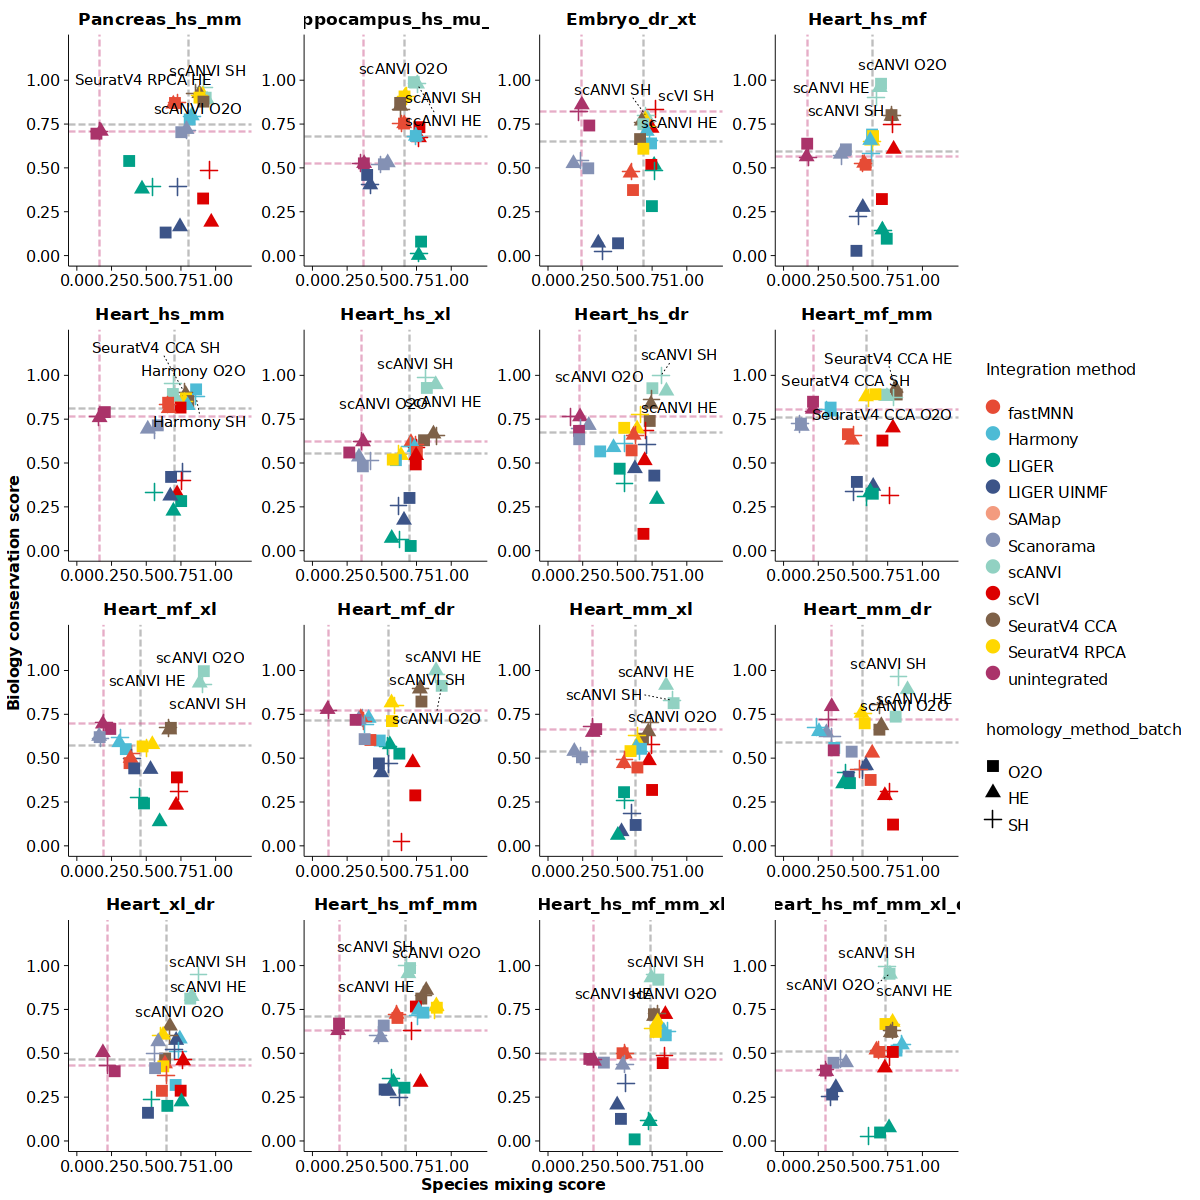

In [22]:
fig_all

## Integrated score by 7 reference tasks

In [27]:
options(repr.plot.height = 4, repr.plot.width =10)

In [28]:
bar = all_scores %>% 
filter(task_name %in% ref_task_order) %>% 
group_by(type) %>% mutate(avg_score_cross_tasks = mean(integrated_score)) %>% 
mutate(sd_score_cross_tasks = sd(integrated_score)) %>% 
ungroup() %>% 
arrange(desc(avg_score_cross_tasks)) %>% 
select(type, avg_score_cross_tasks, sd_score_cross_tasks, integration_method_batch) %>% 
unique() %>% 
ggplot(aes(x = fct_inorder(type), y = avg_score_cross_tasks, color = integration_method_batch)) + 
geom_bar(stat = 'identity', fill = NA, size = 0.4, width = 0.8) +
common_0x + 
scale_color_manual(name = 'Integration method', values = color_pal)  +
geom_errorbar(aes(ymin = avg_score_cross_tasks-sd_score_cross_tasks, ymax = avg_score_cross_tasks+sd_score_cross_tasks), size=0.3, width=0.5) +
labs(y = 'Integrated score', x = 'Integration strategy') +
theme(legend.position = 'none') +
theme(axis.text.x = element_text(angle = 45, hjust=1)) +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1))

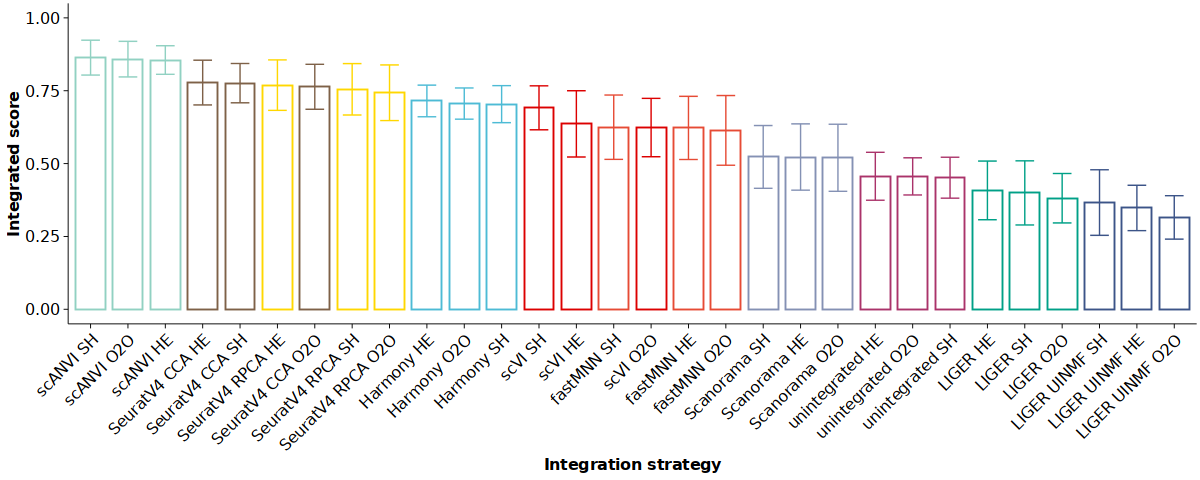

In [29]:
bar